In [45]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [46]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [47]:
step_function(np.array([-10, -1, 1,2,3]))

array([0, 0, 1, 1, 1])

In [48]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
step_function(np.array([-10, -1, 1,2,3]))

array([0, 0, 1, 1, 1])

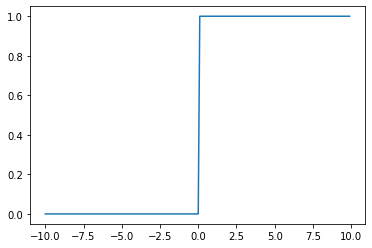

In [49]:
x = np.arange(-10, 10, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [50]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

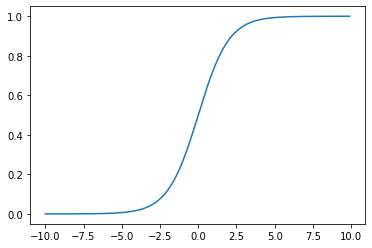

In [51]:
x = np.arange(-10, 10, 0.1)
y = sigmoid_function(x)
plt.plot(x, y)
plt.show()

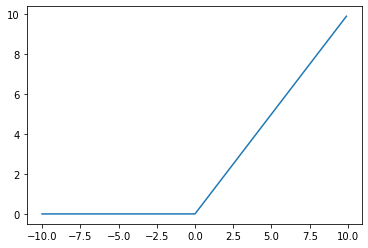

In [52]:
def relu_function(x):
    return np.maximum(x, 0)
x = np.arange(-10, 10, 0.1)
y = relu_function(x)
plt.plot(x, y)
plt.show()

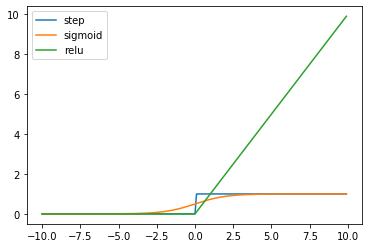

In [53]:
x = np.arange(-10, 10, 0.1)
y1 = step_function(x)
y2 = sigmoid_function(x)
y3 = relu_function(x)
plt.plot(x, y1, label='step')
plt.plot(x, y2, label='sigmoid')
plt.plot(x, y3, label='relu')
plt.legend()
plt.show()

# 多维数组

In [54]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2],[4,5],[6,7]])
print(a,b)

[[1 2 3]
 [4 5 6]] [[1 2]
 [4 5]
 [6 7]]


In [55]:
c = np.dot(a, b)
c

array([[27, 33],
       [60, 75]])

In [56]:
print(a.shape, b.shape, c.shape)

(2, 3) (3, 2) (2, 2)


In [57]:
c.ndim

2

## 內积

In [58]:
X = np.array([1,2])
X.shape

(2,)

In [59]:
W = np.array([[1,3,4],[2,4,6]])
W

array([[1, 3, 4],
       [2, 4, 6]])

In [60]:
W.shape

(2, 3)

In [61]:
Y = np.dot(X, W)
Y

array([ 5, 11, 16])

# 层之间信号传递

In [62]:
# 第一层 1 x 2
# 第二层 1 x 3
# 第三层 1 x 2
X0 = np.array([1,2]) # 1 x 2
W1 = np.array([[1,3,5],
               [2,4,6]]) # 2 x 3
B1 = np.array([0.1, 0.1, 0.1])
W2 = np.array([[-1,3],
               [2,-4],
               [3,-5],]) # 3 x 2
B2= np.array([0.2, 0.2])
A1 = np.dot(X0, W1) + B1
A1

array([ 5.1, 11.1, 17.1])

In [63]:
Z1 = sigmoid_function(A1)
Z1

array([0.9939402 , 0.99998489, 0.99999996])

In [64]:
Z1.shape

(3,)

In [65]:
W2.shape

(3, 2)

In [66]:
A2 = np.dot(Z1,W2)
A2

array([ 4.00602946, -6.01811877])

In [68]:
Z2 = sigmoid_function(A2)
Z2

array([0.98211998, 0.00242833])

In [69]:
def identify_function(x):
    return x

In [70]:
Y = identify_function(Z2)
Y

array([0.98211998, 0.00242833])

# foward network

In [73]:
# input 2
# 2(input) x 3 x 3 x 2(output)
# ooutput 2
def init_network():
    network = {}
    network['W1']  = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1']  = np.array([0.1, 0.2, 0.3])
    
    network['W2']  = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2']  = np.array([0.1, 0.2])
    
    network['W3']  = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3']  = np.array([0.1, 0.2])    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1 # (1 x 2) dot (2 x 3) = (1 x 3)
    z1 = sigmoid_function(a1)
    
    a2 = np.dot(z1, W2) + b2 # (1 x 3) dot (3 x 2) = (1 x 2)
    z2 = sigmoid_function(a2)
    
    a3 = np.dot(z2, W3) + b3 # (1 x 2) dot (2 x 2) = (1 x 2)
    y = identify_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# softmax

In [84]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

a = np.array([1, 3, 4])
a_softmax = softmax(a)
print(a_softmax, "\n", np.sum(a_softmax))

[0.03511903 0.25949646 0.70538451] 
 1.0


In [85]:
b = np.array([1000, 1020, 1050])
softmax(b)

d:\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
d:\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

In [143]:
def softmax(a):
    max = np.max(a)
    exp_a = np.exp(a - max)    
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a
a = np.array([1, 3, 4])
a_softmax = softmax(a)
print(a_softmax, "\n", np.sum(a_softmax))

[0.03511903 0.25949646 0.70538451] 
 0.9999999999999999


In [144]:
b = np.array([1000, 1020, 1050])
softmax(b)

array([1.92874985e-22, 9.35762297e-14, 1.00000000e+00])

# 手写数字识别


In [145]:
import sys, os
sys.path.append('SourceCode')
from dataset.mnist import load_mnist

In [146]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten = True, normalize = False)

In [147]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [148]:
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


## 显示数字

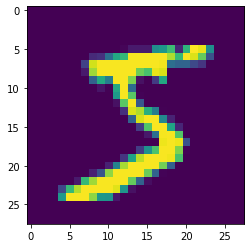

In [149]:
import matplotlib.pylab as plt
from PIL import Image
%matplotlib inline

def show_digit(x):    
    img = x.reshape(28, 28)
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(np.asarray(pil_img))

show_digit(x_train[0])

## 推理

3


d:\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


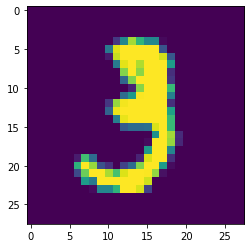

In [154]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("SourceCode/ch03/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)
    
    a2 = np.dot(z1, W2) + b2    
    z2 = sigmoid_function(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
pred = predict(network, x_train[10])
show_digit(x_train[10])
print(np.argmax(pred))

In [164]:
acc_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        acc_cnt += 1
print("accuracy:%.4f" % (float(acc_cnt) / len(x)))

accuracy:0.9352


## 批处理

In [169]:
x, t = get_data()
network = init_network()
batch_size = 100
acc_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]   # 100 x 768
    y_batch = predict(network,  x_batch) # 100 x 10
    p = np.argmax(y_batch, axis=1) # 100 x 1
    acc_cnt += np.sum(p == t[i : i + batch_size]) # Count equal
print("batch accuracy:%.4f" % (float(acc_cnt) / len(x)))

batch accuracy:0.9352
